2540127616 - Nathaniel Susianto Sutanto

# Data Collection

In [ ]:
# kaggle credentials required to access this dataset
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/katerynameleshenko/ai-index')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./ai-index" (use force=True to force download)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/ai-index/AI_index_db.csv')
# menambahkan kolom rank karena data sudah terurut sesuai peringkat total score-nya
df['rank'] = df.index
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,rank
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy,0
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy,1
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy,2
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy,3
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy,4


<h2>Dataset Description:</h2>
The Dataset "AI Global index" includes The Global AI Index itself and seven indicators affecting the Index on 62 countries, as well as general information about the countries (region, cluster, income group and political regime).

The Global AI Index is the first index to benchmark nations on their level of investment, innovation and implementation of artificial intelligence.

Talent, Infrastructure and Operating Environment are the factors of AI Implementation group of indicators, which represents the application of artificial intelligence by professionals in various sectors, such as businesses, governments, and communities.

Talent indicator focuses on the availability of skilled practitioners for the provision of artificial intelligence solutions.
Infrastructure indicator focuses on the reliability and scale of access infrastructure, from electricity and internet, to super computing capabilities.
Operating Environment indicator focuses on the regulatory context, and public opinion surrounding artificial intelligence.
Research and Development are the factors of Innovation group of indicators, which reflects the progress made in technology and methodology, which signify the potential for artificial intelligence to evolve and improve.

Research indicator focuses on the extent of specialist research and researchers; investigating the amount of publications and citations in credible academic journals.
Development indicator focuses on the development of fundamental platforms and algorithms upon which innovative artificial intelligence projects rely.
Government Strategy and Commercial are the factors of Investment group of indicators, which reflects financial and procedural commitments to artificial intelligence.

Government Strategy indicator focuses on the depth of commitment from national government to artificial intelligence; investigating spending commitments and national strategies.
Commercial indicator focuses on the level of startup activity, investment and business initiatives based on artificial intelligence.
All these seven indicators were calculated by Tortoise Media via weighting and summarizing 143 other indicators.

# EDA

In [ ]:
# null value checking
df.isna().any()

Country                  False
Talent                   False
Infrastructure           False
Operating Environment    False
Research                 False
Development              False
Government Strategy      False
Commercial               False
Total score              False
Region                   False
Cluster                  False
Income group             False
Political regime         False
rank                     False
dtype: bool

Text(0.5, 1.0, 'Korelasi antar variabel numerik')

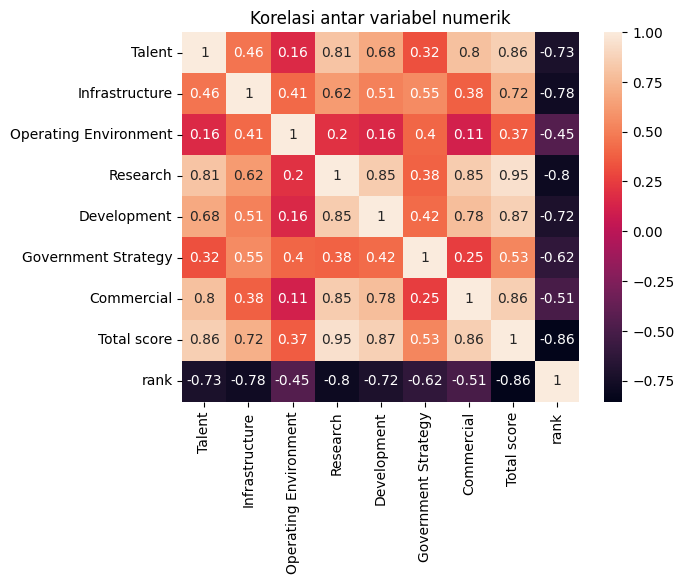

In [ ]:
df_num = df.select_dtypes('number')
sns.heatmap(df_num.corr(), annot=True)
plt.title('Korelasi antar variabel numerik')

<Axes: title={'center': 'Distribusi nilai "Total score"'}, ylabel='Frequency'>

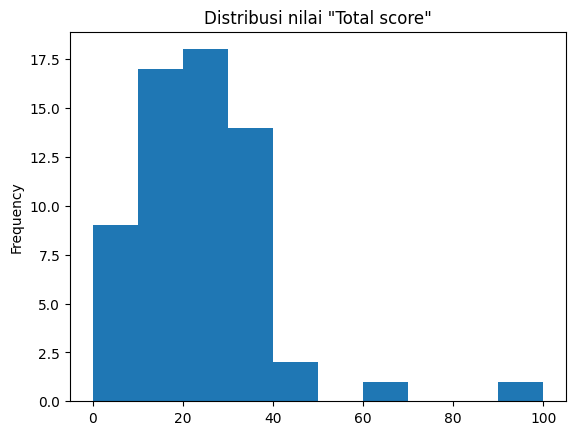

In [ ]:
plt.title('Distribusi nilai "Total score"')
df['Total score'].plot.hist()

<Axes: title={'center': 'Features value distribution'}>

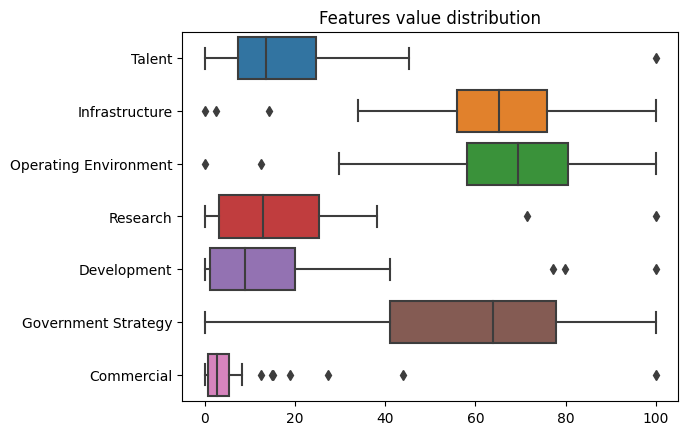

In [ ]:
plt.title('Features value distribution')
sns.boxplot(data=df_num.drop(['Total score','rank'], axis=1), orient="h")

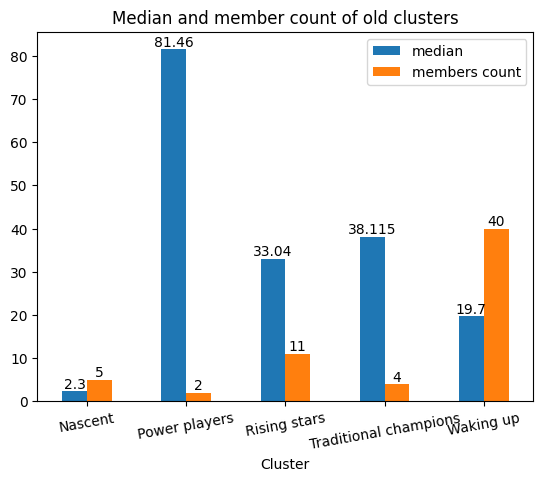

In [ ]:
# menggunakan median karena distribusi data tidak normal
df_oldclus = pd.DataFrame()
df_oldclus['median'] = df.groupby('Cluster').agg('median')['Total score']
df_oldclus['members count'] = df['Cluster'].value_counts()


ax = df_oldclus.plot.bar(rot=10, title='Median and member count of old clusters')
for container in ax.containers:
    ax.bar_label(container)

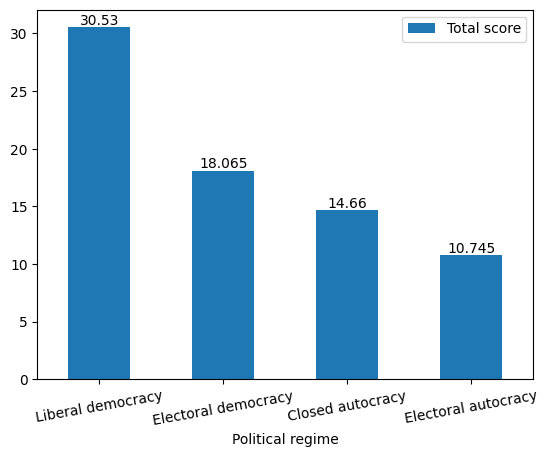

In [ ]:
ax=df.groupby('Political regime').agg('median').sort_values(by='Total score', ascending=False).plot.bar(y='Total score', rot=10)
for container in ax.containers:
    ax.bar_label(container)

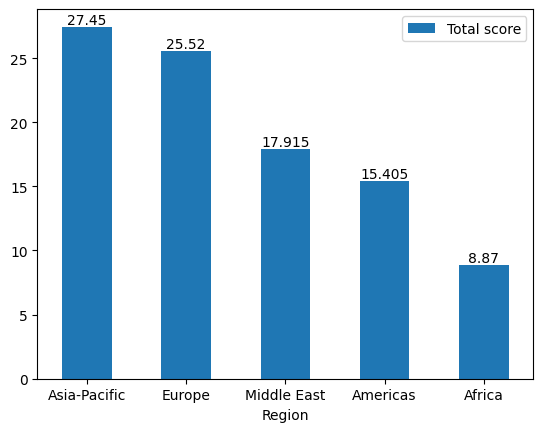

In [ ]:
ax=df.groupby('Region').agg('median').sort_values(by='Total score', ascending=False).plot.bar(y='Total score', rot=0)
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [ ]:
import folium
world_geo = r'world_countries.json'

In [ ]:
# plotting negara sesuai total-score nya
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country','Total score'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    legend_name='Total Score'
)

world_map

# Data preprocessing

In [ ]:
# drop outlier yaitu cluster 'Power players'
df.drop(df[df['Cluster'] == 'Power players'].index, inplace = True)

<Axes: title={'center': 'Distribusi nilai "Total score"'}, ylabel='Frequency'>

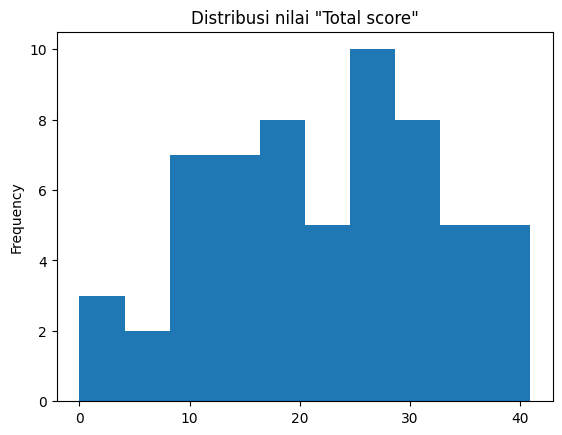

In [ ]:
plt.title('Distribusi nilai "Total score"')
df['Total score'].plot.hist()

In [ ]:
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,rank
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy,2
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy,3
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy,4
5,Singapore,39.38,84.30,43.15,37.67,22.55,79.82,15.07,38.67,Asia-Pacific,Rising stars,High,Electoral democracy,5
6,South Korea,14.54,85.23,68.86,26.66,77.25,87.50,5.41,38.60,Asia-Pacific,Rising stars,High,Liberal democracy,6


In [ ]:
# drop total score karena merupakan feature hasil kalkulasi dan juga rank karena tidak relevan
df_num = df.select_dtypes('number')
df_num.drop(['Total score', 'rank'], axis=1, inplace=True)

# Kmeans clustering

In [ ]:
df_num.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33
5,39.38,84.30,43.15,37.67,22.55,79.82,15.07
6,14.54,85.23,68.86,26.66,77.25,87.50,5.41


Text(0, 0.5, 'Silhouette Score')

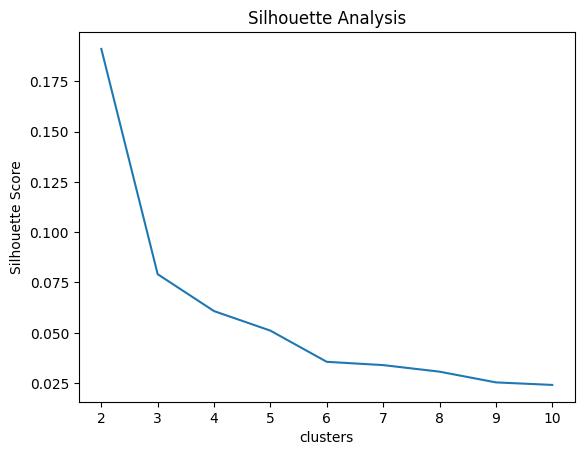

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss= []
silhouette=[]

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_num)
    wcss.append(km.inertia_)
    labels = km.fit_predict(df_num)
    if i>1:
      score = silhouette_score(df_num, labels, metric='euclidean')/i
      silhouette.append(score)

plt.plot(range(2,11), silhouette, marker='none')
plt.title('Silhouette Analysis')
plt.xlabel('clusters')
plt.ylabel('Silhouette Score')

Text(0, 0.5, 'wcss')

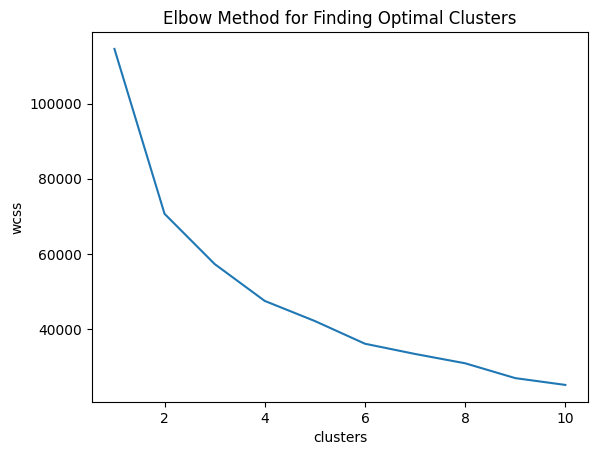

In [ ]:
plt.plot(range(1,11),wcss,marker='none')
plt.title('Elbow Method for Finding Optimal Clusters')
plt.xlabel('clusters')
plt.ylabel('wcss')

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(df_num)
clus = kmean.predict(df_num)

In [ ]:
data = df_num.to_numpy()
s = silhouette_score(data, clus, metric="euclidean")

In [ ]:
s

0.3703954366410381

In [ ]:
df['kmeans'] = clus

In [ ]:
cluster_map = folium.Map(location=[0, 0], zoom_start=2)
cluster_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country','kmeans'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',
    legend_name='Total Score'
)

cluster_map

In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country','Total score'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    legend_name='Total Score'
)

world_map

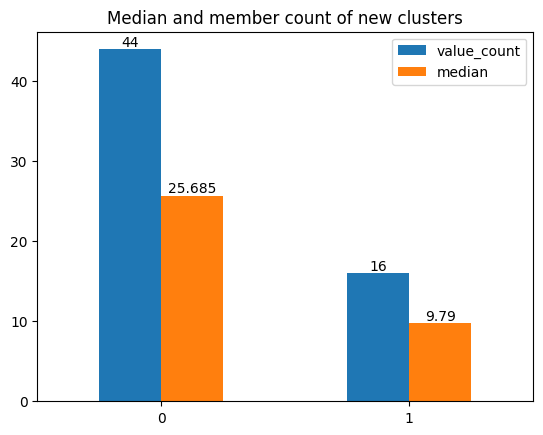

In [ ]:
df_kmeans = pd.DataFrame()
df_kmeans['value_count'] = df['kmeans'].value_counts()
df_kmeans['median'] = df.groupby('kmeans').agg('median')['Total score']

ax=df_kmeans.plot.bar(rot=0, title='Median and member count of new clusters')
for container in ax.containers:
    ax.bar_label(container)